This file creates a model based on MAL dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import time

In [2]:
mal_df_list = [pd.read_pickle('mal_first500A.pkl'),
               pd.read_pickle('mal_first500B.pkl'),
               pd.read_pickle('mal_first500C.pkl'),
               pd.read_pickle('mal_first500D.pkl')]

mal_df = pd.concat(mal_df_list, ignore_index=True)

In [3]:
mal_df.head(10)

Title  \
0             A Brightening Life   
1               A Christmas Song   
2                         A Kite   
3            A Log Day of Timbre   
4                  A New Journey   
5      A Piece of Phantasmagoria   
6                         A Play   
7             A Smart Experiment   
8                   A Tang Qi Yu   
9  A Woman in a Fashion Building   

                                                 URL              English  \
0  https://myanimelist.net/anime/40628/A_Brighten...   A brightening life   
1  https://myanimelist.net/anime/39086/A_Christma...     A Christmas Song   
2           https://myanimelist.net/anime/320/A_Kite                 Kite   
3  https://myanimelist.net/anime/38712/A_Log_Day_...  A Log Day of Timbre   
4  https://myanimelist.net/anime/39057/A_New_Journey                  NaN   
5  https://myanimelist.net/anime/6094/A_Piece_of_...                  NaN   
6         https://myanimelist.net/anime/29902/A_Play                  NaN   
7  https://myanimelist.net/anime/30214/A_Smart_Ex...                  NaN   
8   https://myanimelist.net/anime/37180/A_Tang_Qi_Yu             Tea Pets   
9  https://myanimelist.net/anime/37452/A_Woman_in...                  NaN   

                                         Japanese     Type  Episodes  \
0                              A brightening life    Movie       1.0   
1                                A Christmas Song    Music       1.0   
2                                     A KITE（カイト）      OVA       2.0   
3                             A Log Day of Timbre      ONA       1.0   
4                                   A New Journey      ONA       1.0   
5  a piece of PHANTASMAGORIA (ア・ピース・オブ ファンタスマゴリア)      OVA      15.0   
6                                          A PLAY    Music       1.0   
7                              A smart experiment  Special       1.0   
8                                            阿唐奇遇    Movie       1.0   
9                   A WOMAN IN A FASHION BUILDING    Movie       1.0   

            Status                         Aired  \
0  Finished Airing                          2010   
1  Finished Airing                  Nov 29, 2012   
2  Finished Airing  Feb 25, 1998 to Oct 25, 1998   
3  Finished Airing                  Feb 25, 2011   
4  Finished Airing                  Jan 18, 2019   
5  Finished Airing                          1995   
6  Finished Airing                          2011   
7  Finished Airing                          2006   
8  Finished Airing                  Jul 21, 2017   
9  Finished Airing                          2015   

                           Producers         Licensors  ... Broadcast  \
0                                 []                []  ...       NaN   
1               [Avex Entertainment]                []  ...       NaN   
2  [Green Bunny, BEAM Entertainment]  [Media Blasters]  ...       NaN   
3                                 []                []  ...       NaN   
4                                 []                []  ...       NaN   
5            [Tamura Shigeru Studio]                []  ...       NaN   
6                                 []                []  ...       NaN   
7                                 []                []  ...       NaN   
8                                 []                []  ...       NaN   
9                                 []                []  ...       NaN   

  Adaptation Other  Prequel Parent story  Side story Spin-off Summary  \
0        NaN   NaN      NaN          NaN         NaN      NaN     NaN   
1        NaN   NaN      NaN          NaN         NaN      NaN     NaN   
2        NaN   NaN      NaN          NaN         NaN      NaN     NaN   
3        NaN   NaN      NaN          NaN         NaN      NaN     NaN   
4        NaN   NaN      NaN          NaN         NaN      NaN     NaN   
5        NaN   NaN      NaN          NaN         NaN      NaN     NaN   
6        NaN   NaN      NaN          NaN         NaN      NaN     NaN   
7        NaN   NaN      NaN 

In [4]:
mal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                2000 non-null   object        
 1   URL                  2000 non-null   object        
 2   English              827 non-null    object        
 3   Japanese             1994 non-null   object        
 4   Type                 2000 non-null   object        
 5   Episodes             1943 non-null   float64       
 6   Status               2000 non-null   object        
 7   Aired                2000 non-null   object        
 8   Producers            2000 non-null   object        
 9   Licensors            2000 non-null   object        
 10  Studios              2000 non-null   object        
 11  Source               2000 non-null   object        
 12  Genres               2000 non-null   object        
 13  Duration             2000 non-nul

In [5]:
mal_df.columns

Index(['Title', 'URL', 'English', 'Japanese', 'Type', 'Episodes', 'Status',
       'Aired', 'Producers', 'Licensors', 'Studios', 'Source', 'Genres',
       'Duration', 'Rating', 'Score', 'Ranked', 'Popularity', 'Members',
       'Favorites', 'Started', 'Voters', 'Ended', 'Character', 'Sequel',
       'Alternative version', 'Synonyms', 'Premiered', 'Broadcast',
       'Adaptation', 'Other', 'Prequel', 'Parent story', 'Side story',
       'Spin-off', 'Summary', 'Full story', 'Alternative setting'],
      dtype='object')

In [6]:
mal_df['Type'].value_counts()

TV         617
OVA        473
Movie      324
Special    240
ONA        183
Music      155
Unknown      8
Name: Type, dtype: int64

Drop the most common type - TV

In [7]:
mal_df_typedummy = pd.get_dummies(mal_df['Type']).drop(columns=['TV'])

In [8]:
mal_df_typedummy.columns

Index(['Movie', 'Music', 'ONA', 'OVA', 'Special', 'Unknown'], dtype='object')

In [9]:
mal_eda_df = pd.concat([mal_df, mal_df_typedummy], axis=1)

In [10]:
mal_eda_df.head(5)

Title                                                URL  \
0   A Brightening Life  https://myanimelist.net/anime/40628/A_Brighten...   
1     A Christmas Song  https://myanimelist.net/anime/39086/A_Christma...   
2               A Kite           https://myanimelist.net/anime/320/A_Kite   
3  A Log Day of Timbre  https://myanimelist.net/anime/38712/A_Log_Day_...   
4        A New Journey  https://myanimelist.net/anime/39057/A_New_Journey   

               English             Japanese   Type  Episodes           Status  \
0   A brightening life   A brightening life  Movie       1.0  Finished Airing   
1     A Christmas Song     A Christmas Song  Music       1.0  Finished Airing   
2                 Kite          A KITE（カイト）    OVA       2.0  Finished Airing   
3  A Log Day of Timbre  A Log Day of Timbre    ONA       1.0  Finished Airing   
4                  NaN        A New Journey    ONA       1.0  Finished Airing   

                          Aired                          Producers  \
0                          2010                                 []   
1                  Nov 29, 2012               [Avex Entertainment]   
2  Feb 25, 1998 to Oct 25, 1998  [Green Bunny, BEAM Entertainment]   
3                  Feb 25, 2011                                 []   
4                  Jan 18, 2019                                 []   

          Licensors  ... Spin-off Summary Full story  Alternative setting  \
0                []  ...      NaN     NaN        NaN                  NaN   
1                []  ...      NaN     NaN        NaN                  NaN   
2  [Media Blasters]  ...      NaN     NaN        NaN                  NaN   
3                []  ...      NaN     NaN        NaN                  NaN   
4                []  ...      NaN     NaN        NaN                  NaN   

  Movie  Music ONA OVA  Special  Unknown  
0     1      0   0   0        0        0  
1     0      1   0   0        0        0  
2     0      0   0   1        0        0  
3     0      0   1   0        0        0  
4     0      0   1   0        0        0  

[5 rows x 44 columns]

In [11]:
mal_eda_df['Status'].value_counts()

Finished Airing     1926
Not yet aired         45
Currently Airing      29
Name: Status, dtype: int64

In [12]:
mal_eda_df = mal_eda_df[mal_eda_df['Status'] != 'Not yet aired']

In [13]:
mal_eda_df['Rating'].value_counts()

PG-13 - Teens 13 or older         684
G - All Ages                      626
PG - Children                     171
Rx - Hentai                       166
R - 17+ (violence & profanity)    159
R+ - Mild Nudity                  110
None                               39
Name: Rating, dtype: int64

In [14]:
mal_rating_map = {  'None': 2,                   # assume None to be the most common rating, aka PG-13
                    'G - All Ages': 0,
                    'PG - Children': 1,
                    'PG-13 - Teens 13 or older': 2,
                    'R - 17+ (violence & profanity)': 3,
                    'R+ - Mild Nudity': 4,
                    'Rx - Hentai': 5}

In [15]:
mal_eda_df['Rating score'] = mal_df['Rating'].replace(mal_rating_map)

In [16]:
mal_eda_df['Total length'] = mal_df['Episodes'] * mal_df['Duration']

In [17]:
mal_eda_df['Started'].describe()

count                    1941
unique                   1587
top       2002-01-01 00:00:00
freq                        8
first     1917-02-01 00:00:00
last      2020-04-18 00:00:00
Name: Started, dtype: object

In [18]:
mal_eda_df['Started'].sort_values()

1702   1917-02-01
1148   1917-04-28
1147   1917-08-11
1364   1917-10-07
226    1924-01-01
          ...    
1307          NaT
1335          NaT
1401          NaT
1452          NaT
1818          NaT
Name: Started, Length: 1955, dtype: datetime64[ns]

In [19]:
np.isnat(mal_eda_df['Started'].sort_values())

1702    False
1148    False
1147    False
1364    False
226     False
        ...  
1307     True
1335     True
1401     True
1452     True
1818     True
Name: Started, Length: 1955, dtype: bool

In [21]:
mal_eda_df['No start date'] = np.isnat(mal_eda_df['Started'])

In [24]:
mal_eda_df[mal_eda_df['No start date']]

Title  \
315             Alan-kun no Koutsuu Rule wo Mamorou ne!   
814                                     Big X Episode 0   
1057                  Captain Tsubasa no Shouka Sakusen   
1177                      Charamaru-kun to Dokumaru-kun   
1204                                     Cherry Blossom   
1223                    Chibi Maruko-chan: Hi no Youjin   
1224              Chibi Maruko-chan: Jishin wo Kangaeru   
1254                               Chii Jiaan Chuaanqii   
1256                             Chii-chan no Kageokuri   
1307       Chikyuu SOS: Chikyuu ga Netsu wo Dashite Iru   
1335  Chirorin Mura Monogatari: Tomkurupii no Jishin...   
1401                                     Chouetsu Sekai   
1452                                    Christmas Carol   
1818                                      Devil & Devil   

                                                    URL              English  \
315   https://myanimelist.net/anime/35150/Alan-kun_n...                  NaN   
814   https://myanimelist.net/anime/30839/Big_X_Epis...                  NaN   
1057  https://myanimelist.net/anime/39226/Captain_Ts...                  NaN   
1177  https://myanimelist.net/anime/30959/Charamaru-...                  NaN   
1204  https://myanimelist.net/anime/26237/Cherry_Blo...                  NaN   
1223  https://myanimelist.net/anime/35125/Chibi_Maru...                  NaN   
1224  https://myanimelist.net/anime/35126/Chibi_Maru...                  NaN   
1254  https://myanimelist.net/anime/30060/Chii_Jiaan...  Crimson Sword Quest   
1256  https://myanimelist.net/anime/33831/Chii-chan_...                  NaN   
1307  https://myanimelist.net/anime/39144/Chikyuu_SO...                  NaN   
1335  https://myanimelist.net/anime/35123/Chirorin_M...                  NaN   
1401  https://myanimelist.net/anime/38196/Chouetsu_S...                  NaN   
1452  https://myanimelist.net/anime/35104/Christmas_...    A Christmas Carol   
1818  https://myanimelist.net/anime/40345/Devil___Devil                  NaN   

                    Japanese     Type  Episodes           Status  \
315    アランくんの こうつうルールをまもろうね！      OVA       1.0  Finished Airing   
814                  ビッグX 00  Special       1.0  Finished Airing   
1057             キャプテン翼の消火作戦      OVA       1.0  Finished Airing   
1177            キャラ丸くんとドク丸くん      OVA       1.0  Finished Airing   
1204               チェリーブラッサム      OVA       1.0  Finished Airing   
1223           ちびまる子ちゃん　火の用心      OVA       1.0  Finished Airing   
1224         ちびまる子ちゃん　地震を考える      OVA       1.0  Finished Airing   
1254                    赤剑传奇       TV      26.0  Finished Airing   
1256             ちいちゃんのかげおくり      OVA       1.0  Finished Airing   
1307        地球SOS 地球が熱を出している      OVA       1.0  Finished Airing   
1335  チロリン村物語 トンクルピーのじしんようじん      OVA       1.0  Finished Airing   
1401                    超越世界      OVA      10.0  Finished Airing   
1452               クリスマスキャロル      OVA       1.0  Finished Airing   
1818    CM 小学館 少年サンデー「デビデビ」編  Special       1.0  Finished Airing   

              Aired Producers Licensors  ... Alternative setting Movie Music  \
315   Not available        []        []  ...                 NaN     0     0   
814   Not available        []        []  ...                 NaN     0     0   
1057  Not available        []        []  ...                 NaN     0     0   
1177  Not available        []        []  ...                 NaN     0     0   
1204  Not available        []        []  ...                 NaN     0     0   
1223  Not available        []        []  ...                 NaN     0     0   
1224  Not available        []        []  ...                 NaN     0     0   
1254  Not available        []        []  ...                 NaN     0     0   
1256  Not available        []        []  ...                 NaN     0     0   
1307  Not available        []        []  ...                 NaN     0     0   
1335  Not available        []        []  ...                 N

In [25]:
mal_eda_df = mal_eda_df[mal_eda_df['No start date'] == False]

In [26]:
mal_eda_df['UNIX started'] = mal_eda_df['Started'].apply(pd.Timestamp.timestamp)

In [27]:
mal_eda_df['UNIX started'].describe()

count    1.941000e+03
mean     1.092942e+09
std      4.655658e+08
min     -1.669853e+09
25%      8.919072e+08
50%      1.222906e+09
75%      1.426982e+09
max      1.587168e+09
Name: UNIX started, dtype: float64

In [28]:
mal_df_tv = mal_eda_df[mal_eda_df['Type'] == 'TV']
mal_df_movie = mal_eda_df[mal_eda_df['Type'] == 'Movie']
mal_df_ova = mal_eda_df[mal_eda_df['Type'] == 'OVA']

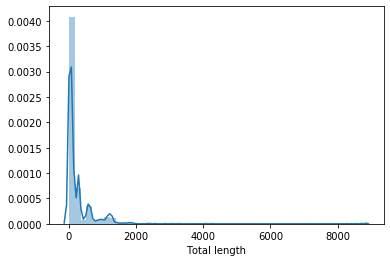

In [29]:
sns.distplot(mal_eda_df['Total length']);

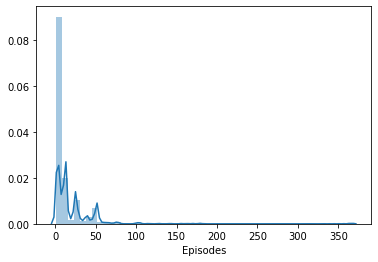

In [30]:
sns.distplot(mal_eda_df['Episodes']);

In [31]:
mal_df_movie['Episodes'].value_counts()

1.0    305
3.0      4
2.0      2
Name: Episodes, dtype: int64

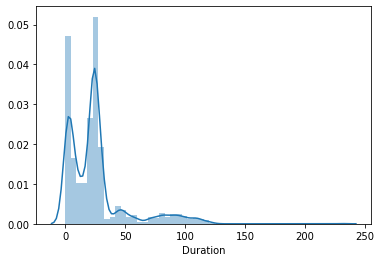

In [32]:
sns.distplot(mal_eda_df['Duration']);

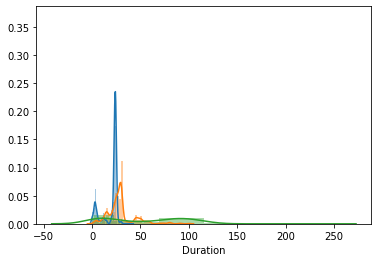

In [33]:
sns.distplot(mal_df_tv['Duration'])
sns.distplot(mal_df_ova['Duration'])
sns.distplot(mal_df_movie['Duration']);

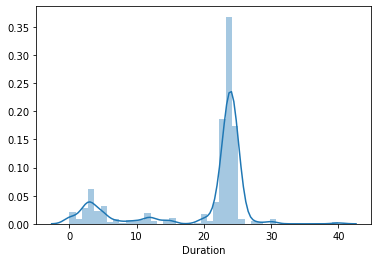

In [34]:
sns.distplot(mal_df_tv['Duration']);

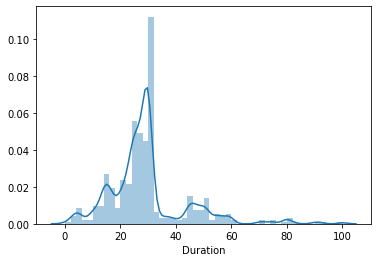

In [35]:
sns.distplot(mal_df_ova['Duration']);

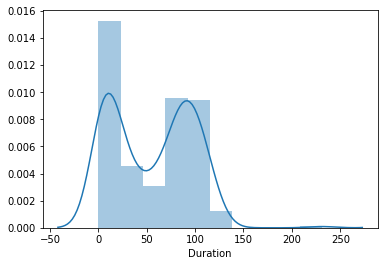

In [36]:
sns.distplot(mal_df_movie['Duration']);

In [62]:
#mal_eda_df['Clipped duration'] = mal_eda_df['Duration'].clip(0,150)
#mal_eda_df['Clipped episodes'] = mal_eda_df['Episodes'].clip(0,60)

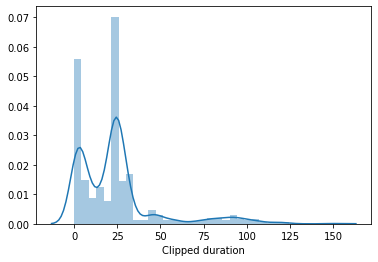

In [60]:
#sns.distplot(mal_eda_df['Clipped duration']);

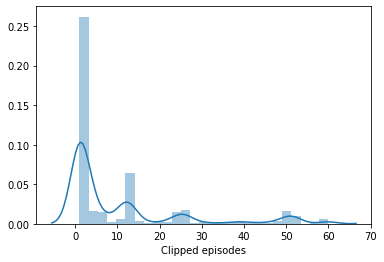

In [63]:
#sns.distplot(mal_eda_df['Clipped episodes']);

In [37]:
mal_columns = ['Score', 'UNIX started', 'Duration', 'Episodes', 'Rating score', 'Members', 'Favorites']

In [38]:
mal_df_mvp = mal_df_tv[mal_columns]

In [39]:
mal_df_mvp.head(5)

Score  UNIX started  Duration  Episodes  Rating score  Members  Favorites
10   6.99  1.302221e+09        24      12.0             2    81928        314
15    NaN  1.006387e+09        25      13.0             0      459          3
18   6.05  9.235296e+08        24      12.0             2     8382         12
23   6.37  1.578960e+09        23       NaN             2     8574         71
25   6.15  7.039872e+08        24      23.0             2     1154          6

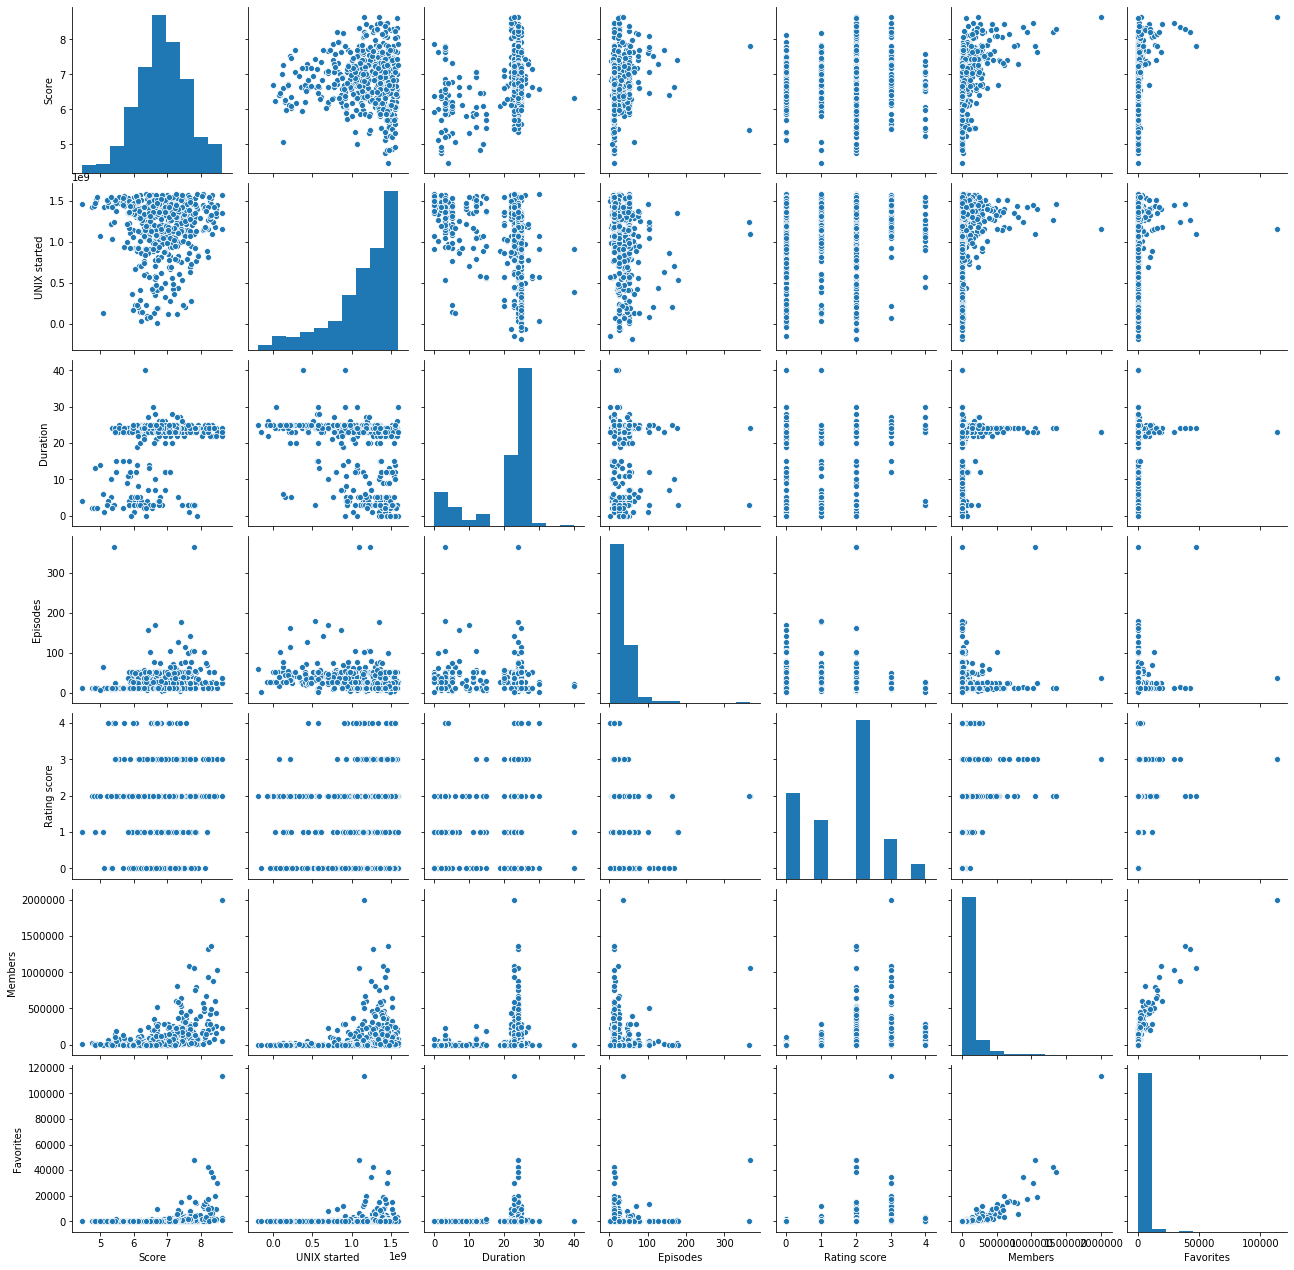

In [40]:
sns.pairplot(mal_df_mvp);

In [41]:
mal_df_mvp['Log episodes'] = np.log(mal_df_mvp['Episodes'] + 1)
#mal_df_mvp['Log duration'] = np.log(mal_df_mvp['Duration'] + 1)
mal_df_mvp['Log members'] = np.log(mal_df_mvp['Members'] + 1)
mal_df_mvp['Log favorites'] = np.log(mal_df_mvp['Favorites'] + 1)

mal_df_mvp_log = mal_df_mvp.drop(columns=['Episodes', 'Members', 'Favorites'])

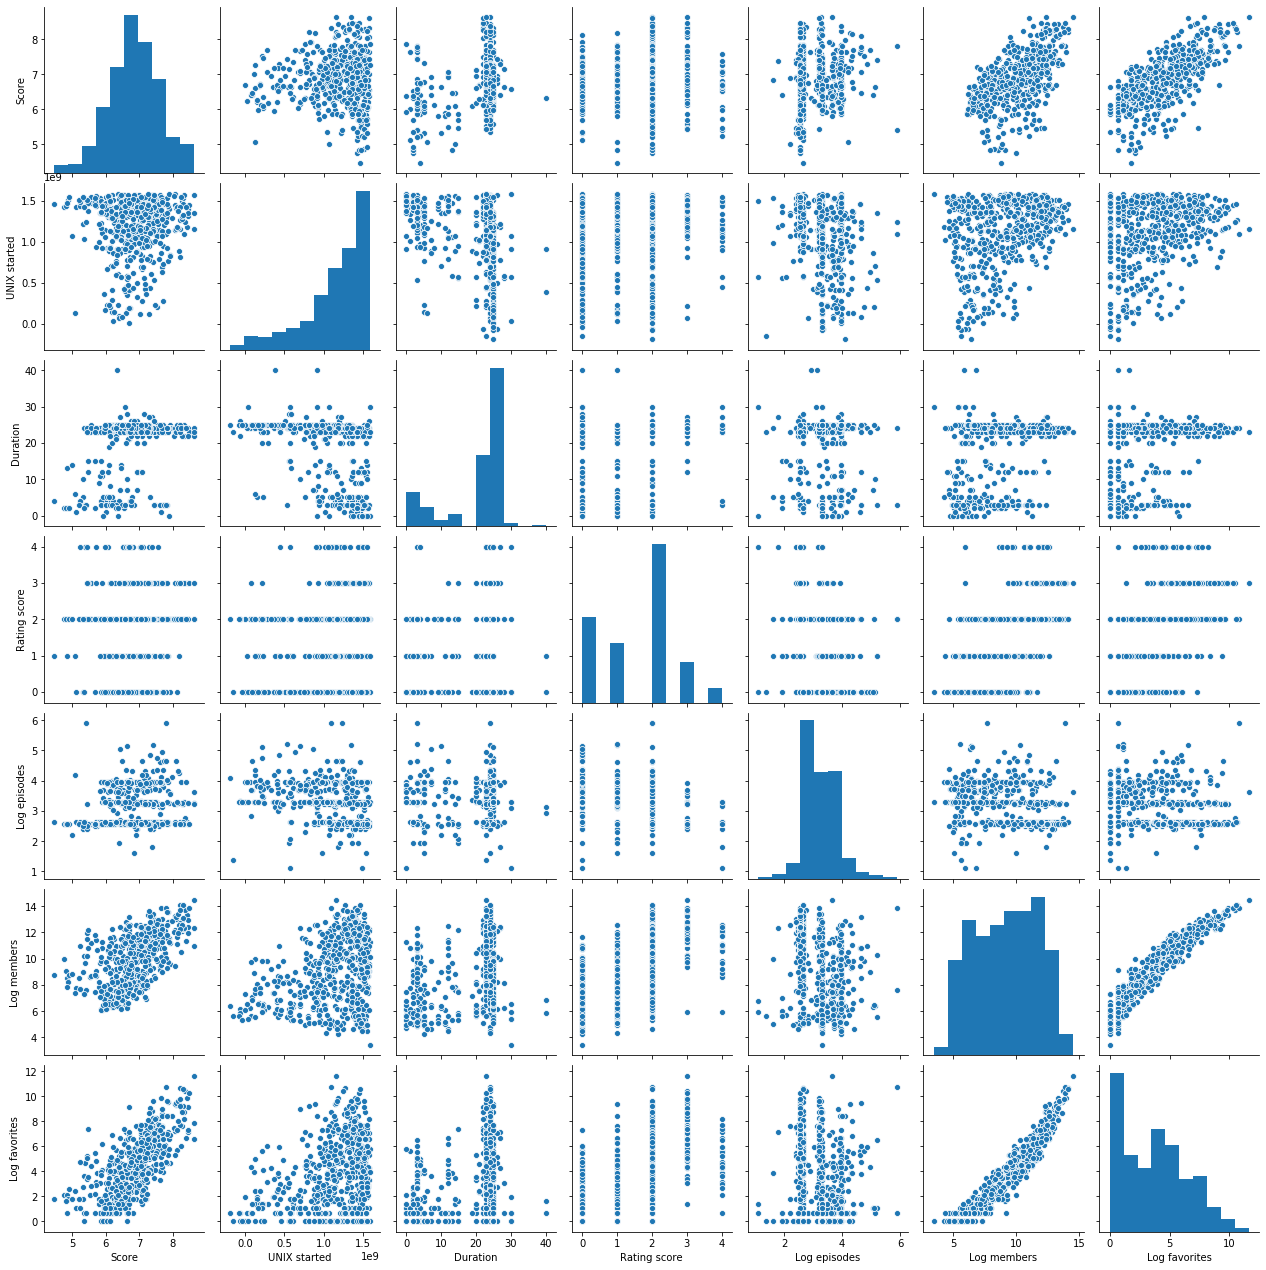

In [42]:
sns.pairplot(mal_df_mvp_log);